# Classification & Clustering

**Team work is not allowed.** Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

## Part 1: Forest Cover Type Classification

In this exercise, we will **predict the forest cover type** (the predominant kind of tree cover) from strictly cartographic variables. 
As in the regression assignment, Y stands for a column vector of "target" values, that is the i-th row of Y contains the desired output for the i-th data point. Contrary to regression, the elements of Y in this classification task are integer values.

We will work with several popular classifiers provided by Scikit-learn package.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. 

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Data Dictionary

|Variable Name | Description |
|-|-|
| Elevation | Elevation in meters.|
| Aspect | Aspect in degrees azimuth.|
| Slope | Slope in degrees.|
| Horizontal_Distance_To_Hydrology | Horizontal distance to nearest surface water features.|
| Vertical_Distance_To_Hydrology | Vertical distance to nearest surface water features.|
| Horizontal_Distance_To_Roadways | Horizontal distance to nearest roadway.|
| Hillshade_9am | Hill shade index at 9am, summer solstice. Value out of 255.|
| Hillshade_Noon | Hill shade index at noon, summer solstice. Value out of 255.|
| Hillshade_3pm | Hill shade index at 3pm, summer solstice. Value out of 255.|
| Horizontal_Distance_To_Fire_Points | sHorizontal distance to nearest wildfire ignition points.|
| Wilderness_Area1 | Rawah Wilderness Area|
| Wilderness_Area2 | Neota Wilderness Area|
| Wilderness_Area3 | Comanche Peak Wilderness Area|
| Wilderness_Area4 | Cache la Poudre Wilderness Area|
| Soil_Type| Soil_Type1 to Soil_Type40 (Total 40 Types)|
| **Cover_Type** | Forest Cover Type designation. |

**Cover_Type** Integer value between 1 and 7, with the following key:

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz



## Objective: 

We will **predict different cover types** in different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.


In [16]:
# import packages
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1) Load data

- Use ```pandas.read_csv()``` to load the data.

In [17]:
df = pd.read_csv('ForestCover.csv')

- Visualize the first and the last 5 rows of the data, using ```.head()``` and ```.tail()```.

In [18]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [19]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


## 2) Basic statistics
- Print overall info, using ```.info()```.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

- Print dataframe statistics using ```.describe()```.

In [21]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Check if there are missing values, using ```.isnull().sum()```. If yes, drop them or fill them.

In [22]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## 3) Exploratory Data Analysis
- Show the category distribution, using ```.value_counts()```.

In [23]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

- Visulise this distribution, using ```sns.countplot()```

/var/folders/hw/y61sswm55ss5_mz_3jfglnh03lrr77/T/ipykernel_93185/1386903904.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([cover_type_dict[i] for i in range(1, 8)], rotation=45, ha='right')


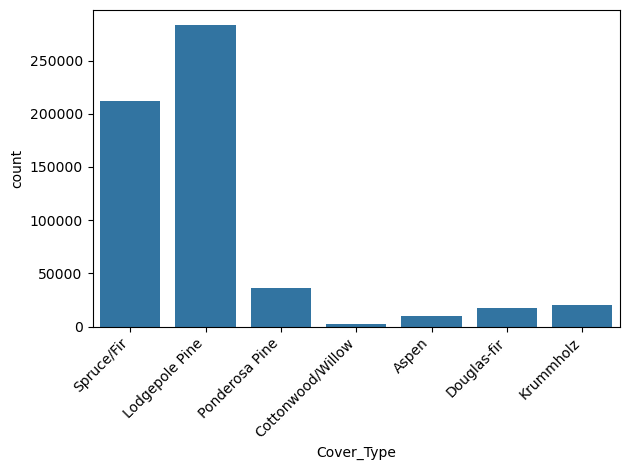

In [24]:
cover_type_dict = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
ax = sns.countplot(x='Cover_Type', data=df)
ax.set_xticklabels([cover_type_dict[i] for i in range(1, 8)], rotation=45, ha='right')
plt.tight_layout()

### Feature Histograms 
- Visulize data distribution of the first four features via Histograms using ```sns.histplot()```. (Show four figures.)

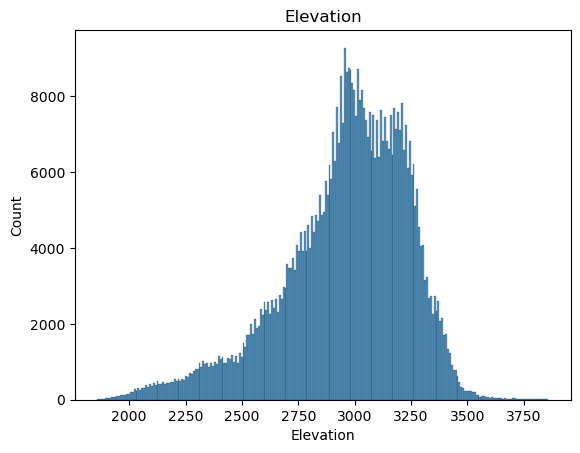

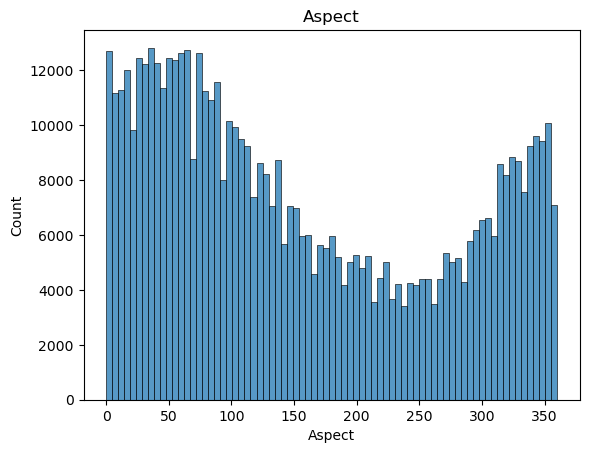

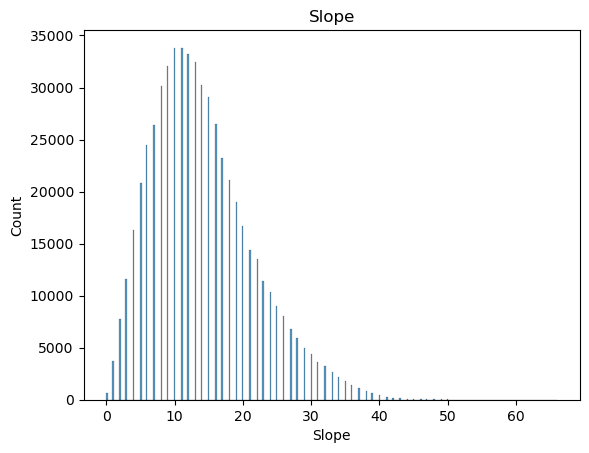

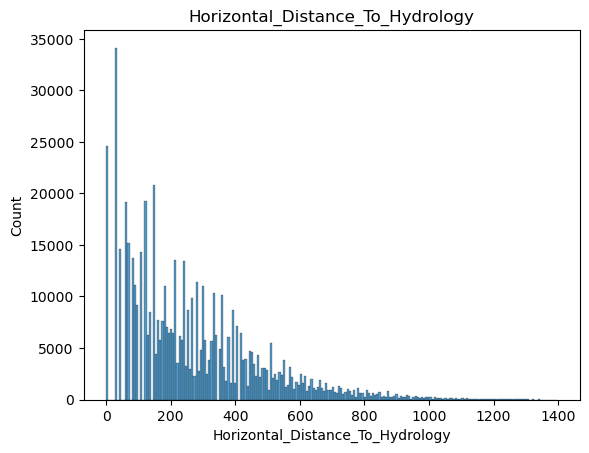

In [25]:
for key in df.keys()[:4]:
    sns.histplot(x=df[key])
    plt.title(key)
    plt.show()

### Correlation between Variables
- Show correlation between variables, using ```sns.heatmap()```. (Since 55 columns are too many, please show here a 10x10 heatmap for the first 10 features. )

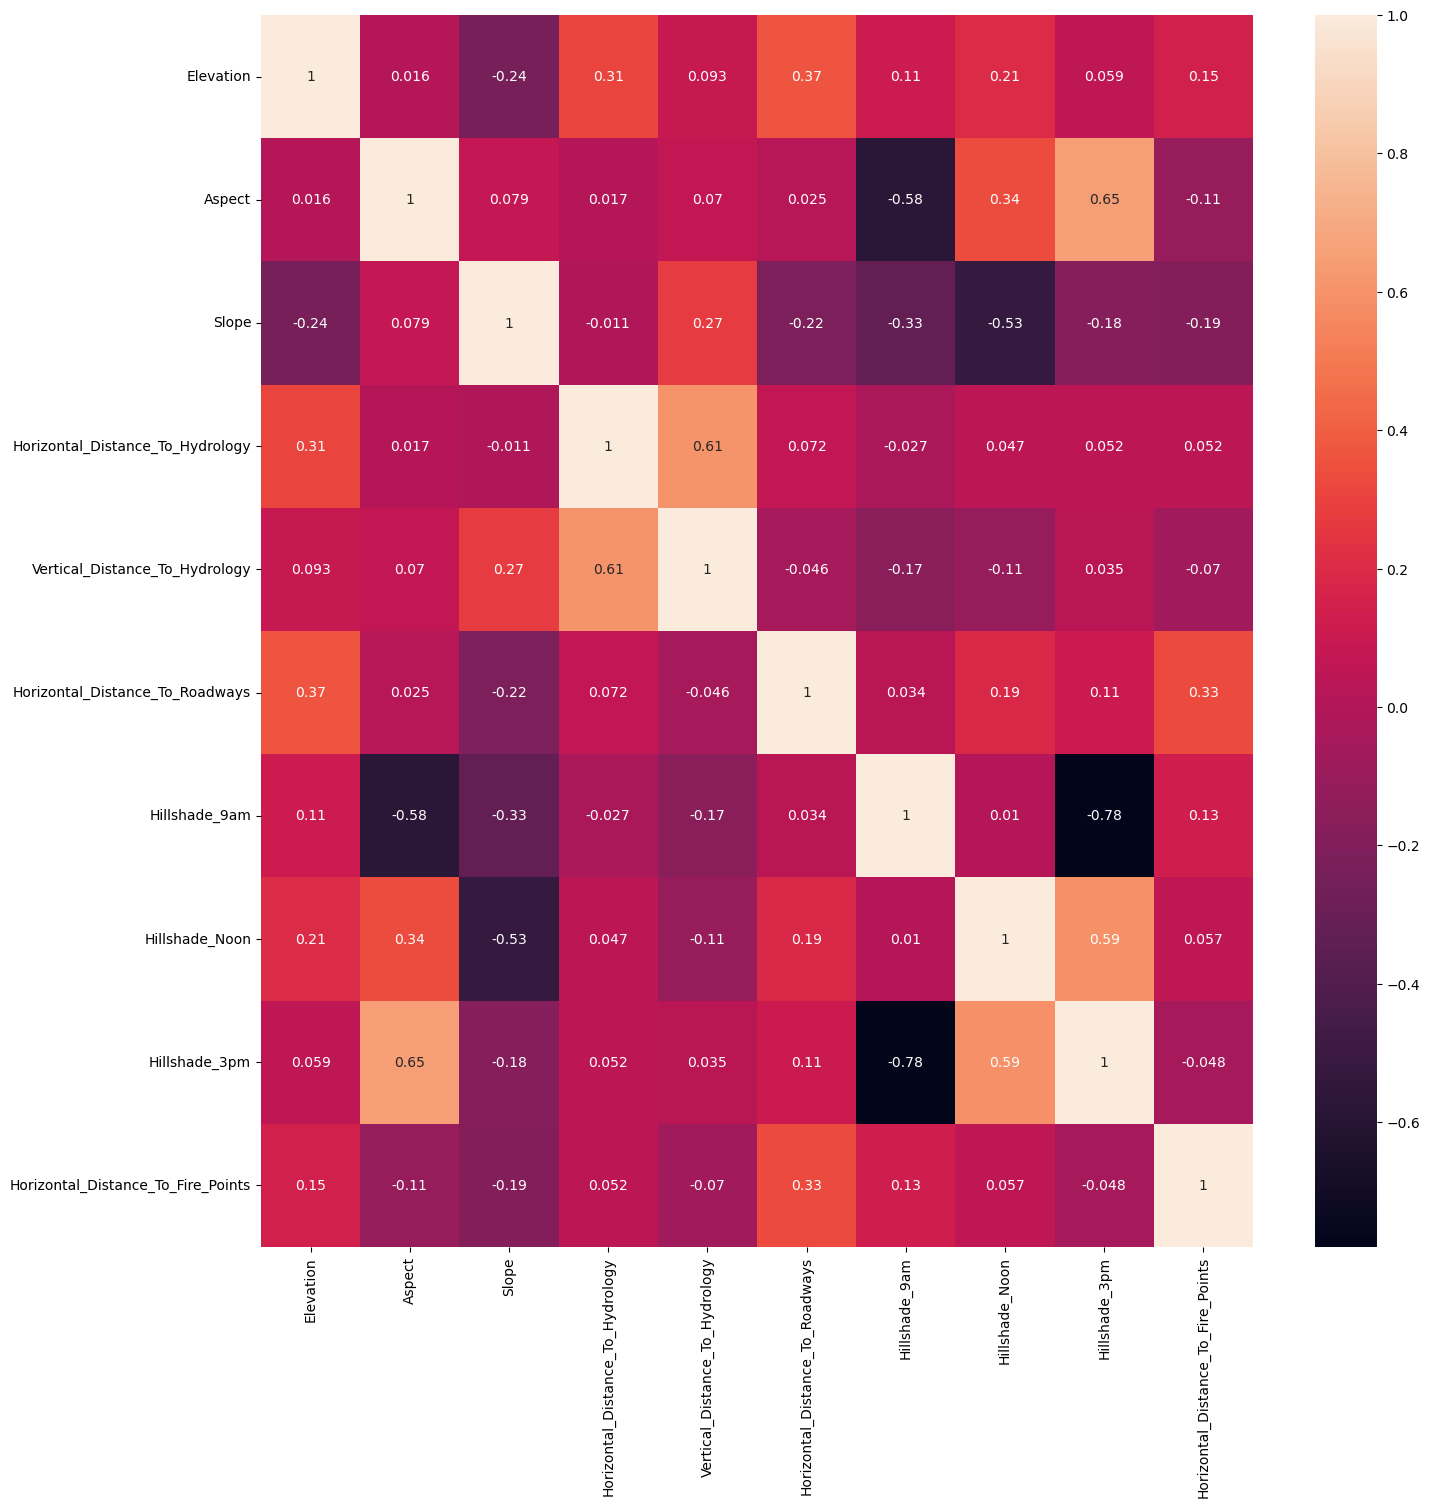

In [26]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.iloc[:, :10].corr(), annot=True)
plt.show()

### Data Distribution w.r.t. Categories
- Show data distribution w.r.t. categories, using ```sns.boxplot()```. (x-axis: cover type, y-axis: feature variable, please show 10 figures for the first 10 variables.)

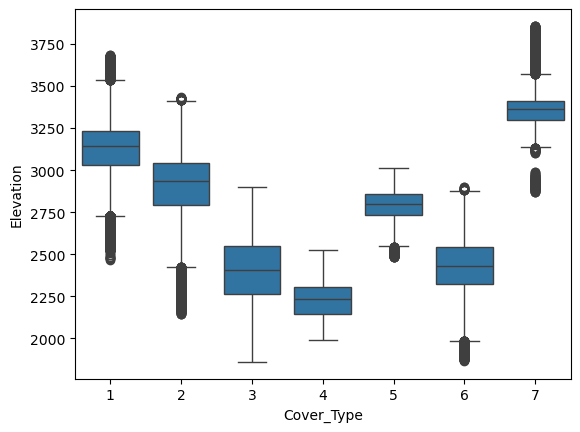

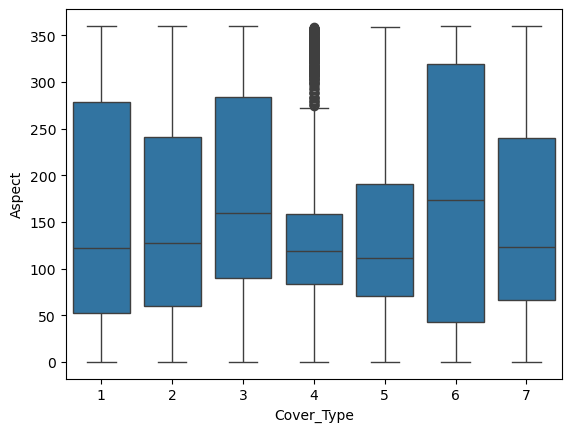

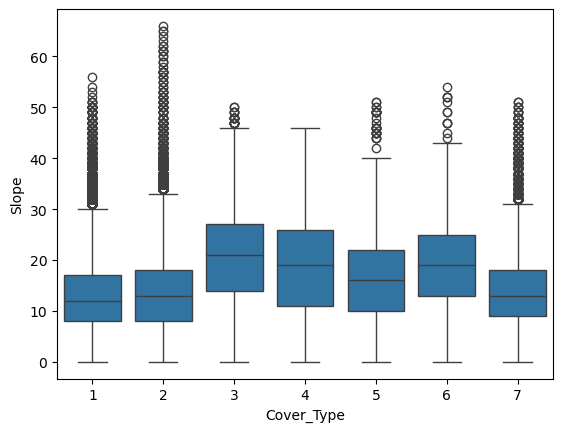

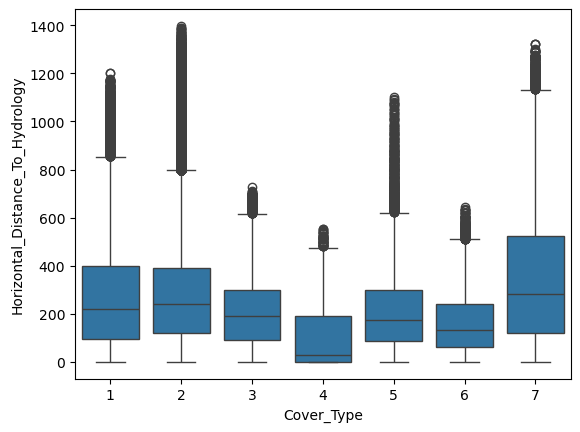

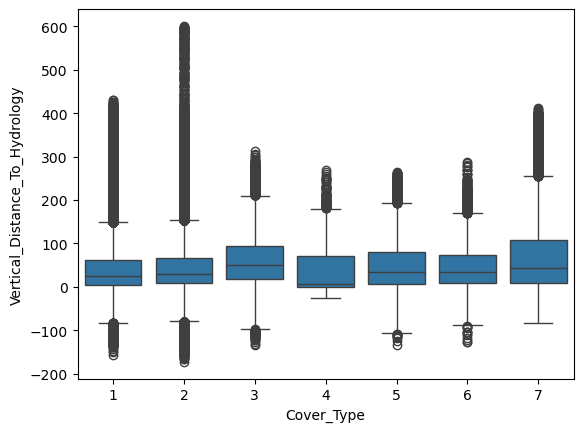

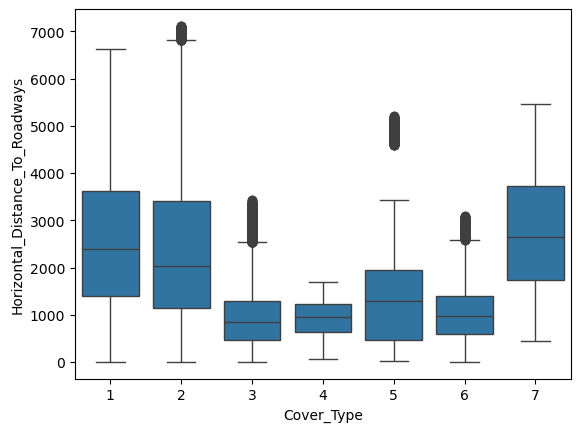

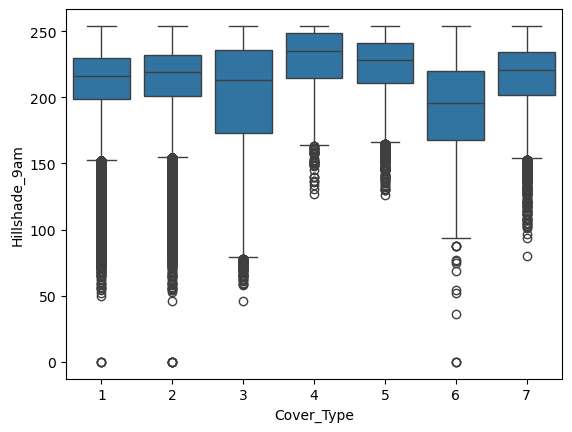

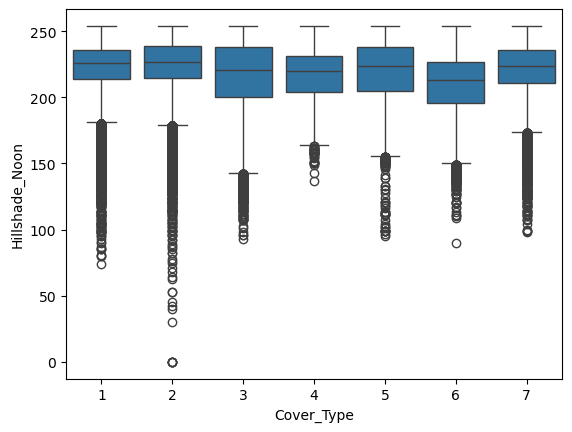

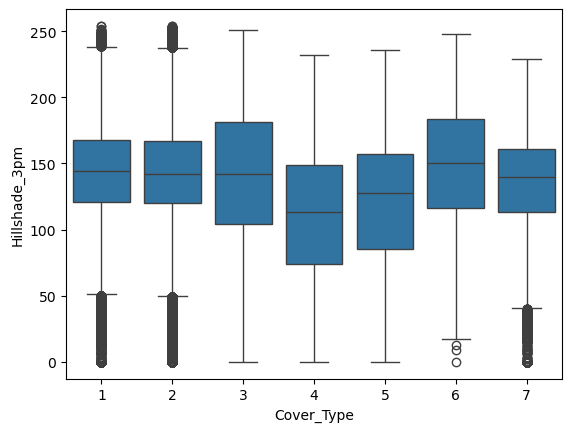

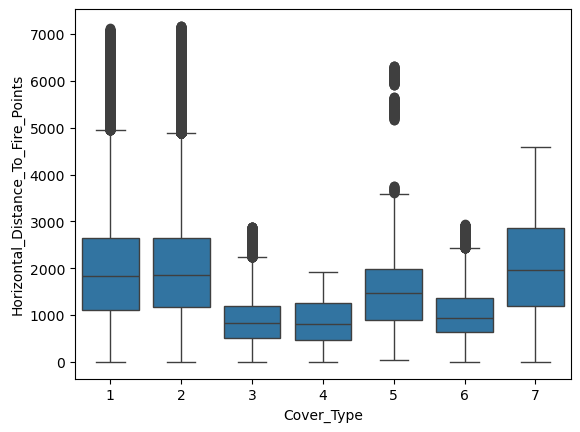

In [27]:
for key in df.keys()[:10]:
    sns.boxplot(data=df, x='Cover_Type', y=key)
    plt.show()

- Are there any features which shows not much of variance with respect to classes? Which ones?

- Which features might do good job in the prediction?

## 4) Training Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

- Define Feature (as X) and Target (as y)

In [29]:
X = df.drop(columns='Cover_Type').iloc[:, :10]
y = df['Cover_Type']

- Split the data into train (70%) and test (30%), use a random seed.
- Print the size of the train and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (406708, 10)
Test data size: (174304, 10)


- Normalize the data using ```StandardScaler()```

In [32]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### 4a) Logistic Regression
- Train the Linear Regression model

In [33]:
%%time
model_lr = LogisticRegression(solver='sag', n_jobs=-1)
model_lr.fit(X_train, y_train)

CPU times: user 7.06 s, sys: 81 ms, total: 7.14 s
Wall time: 7.29 s


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


- Predict on the test data

In [34]:
y_pred = model_lr.predict(X_test)

- Compute and print performance metrics, using ```accuracy_score()``` to compute the fraction of correctly classified samples.

In [35]:
accuracy_score(y_test, y_pred)

0.6963695612263632

### 4b) Random Forest
- Train and test with the Random Forest classifier
- Print the accuracy

In [36]:
%%time
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 1.2 s, total: 1min 50s
Wall time: 12.9 s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
%%time
y_pred = model_rf.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: user 5.5 s, sys: 269 ms, total: 5.77 s
Wall time: 731 ms


0.948601294290435

### 4c) K Nearest Neighbor
- Train and test with the KNN classifier
- Print the accuracy

(It might take a bit long, around an hour if using one cpu core.)

In [38]:
%%time
model_knn = KNeighborsClassifier(n_jobs=-1)
model_knn.fit(X_train, y_train)

CPU times: user 258 ms, sys: 17.4 ms, total: 275 ms
Wall time: 292 ms


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [39]:
%%time
y_pred = model_knn.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: user 16.7 s, sys: 118 ms, total: 16.8 s
Wall time: 2.19 s


0.8987114466678906

### OPTIONAL 4d) Support Vector Machine
- Train and test with the SVM classifier
- Print the accuracy

(It might take a bit long, around 3 hours if using one cpu core...)

In [40]:
# %%time
# model_svc = svm.SVC()
# model_svc.fit(X_train, y_train)

In [41]:
# %%time
# y_pred = model_svc.predict(X_test)
# accuracy_score(y_test, y_pred)

### Conclusion
- Please write your conclusion:

As we have seen in 3), the data is imbalanced.

### 5a) Training with under-sampled data

- print the size of the smallest class

In [ ]:
min_class_size = df['Cover_Type'].value_counts().min()
print("Size of smallest class: ", min_class_size)

Size of smallest class:  2747


- Undersample all the majority classes so that all classes has the same smallest cardinality.

In [ ]:
# subsets for each class, using .query()
# downsample each subset, using .sample()
# concatenate the seven subsets, using .concat(), and shuffle the data (using .sample() on the full set)

temp_list = []
for target in df['Cover_Type'].unique():
    subset = df[df['Cover_Type'] == target]
    temp_list.append(subset.sample(n=min_class_size))
    
under_sample_df = pd.concat(temp_list, axis=0)
under_sample_df = under_sample_df.sample(frac=1.0)

- check the class distribution of the undersampled data

In [ ]:
under_sample_df['Cover_Type'].value_counts()

Cover_Type
3    2747
2    2747
6    2747
5    2747
7    2747
4    2747
1    2747
Name: count, dtype: int64

- Preprocessing data (define X, y; train test split; normalize data)

In [ ]:
X_under = under_sample_df.drop(columns='Cover_Type')
y_under = under_sample_df['Cover_Type']

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

# normalize data

normalizer = StandardScaler()
X_under_train = normalizer.fit_transform(X_under_train)
X_under_test = normalizer.transform(X_under_test)

print('Training undersampled data size:',X_under_train.shape)
print('Test undersampled data size:',X_under_test.shape)

Training undersampled data size: (13460, 54)
Test undersampled data size: (5769, 54)


- Train and test the random forest classifier on under-sampled data
- Print the accuracy

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(X_under_train, y_under_train)
y_pred = model_rf.predict(X_under_test)
accuracy_score(y_under_test, y_pred)

0.8620211475125672

### 5b) Training with over-sampled data

- print the size of the largest class

In [ ]:
max_class_size = df['Cover_Type'].value_counts().max()
print("Size of largest class: ", max_class_size)

Size of largest class:  283301


- Oversample the classes.

In [ ]:
# subsets for each class, using .query()
# oversample each subset, using .sample()
# concatenate the seven subsets, using .concat(), and shuffle the data (using .sample() on the full set)
temp_list = []
for target in df['Cover_Type'].unique():
    subset = df[df['Cover_Type'] == target]
    temp_list.append(subset.sample(n=max_class_size, replace=True))
    
over_sample_df = pd.concat(temp_list, axis=0)
over_sample_df = over_sample_df.sample(frac=1.0)

- check the class distribution of the oversampled data

In [ ]:
over_sample_df['Cover_Type'].value_counts()

Cover_Type
2    283301
5    283301
4    283301
1    283301
6    283301
3    283301
7    283301
Name: count, dtype: int64

- Preprocessing data (define X, y; train test split; normalize data)

In [ ]:
X_over = over_sample_df.drop(columns='Cover_Type')
y_over = over_sample_df['Cover_Type']

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

# normalize data
X_over_train = normalizer.fit_transform(X_over_train)
X_over_test = normalizer.transform(X_over_test)

print('Training oversampled data size:',X_over_train.shape)
print('Test oversampled data size:',X_over_test.shape)

Training oversampled data size: (1388174, 54)
Test oversampled data size: (594933, 54)


- Train and test the random forest classifier on over-sampled data
- Print the accuracy

In [ ]:
model_rf.fit(X_over_train, y_over_train)
y_pred = model_rf.predict(X_over_test)
accuracy_score(y_over_test, y_pred)

0.9941136228785427

### Conclusion on imbalanced data solution (with random forest classifier):

Accuracy:

- imbalanced data:

- undersampled data: 

- oversampled data: 

There is a bit of cheating in over-sampling: Some of the data are copied both in train and test set.

# Clustering 

## 1) sklearn K-means

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift
%matplotlib inline 

### 1a) Toy dataset: blobs
- Load toy dataset (blobs).

In [43]:
data_blobs = np.genfromtxt('toy_data.csv', delimiter=',')

- Use sklearn kmeans function (parameters by defalt) to cluster points.

In [44]:
model = KMeans()
y_kmeans_blobs = model.fit_predict(data_blobs)

- Plot clustering results using ```plt.scatter()``` and color the datapoints according to their cluster

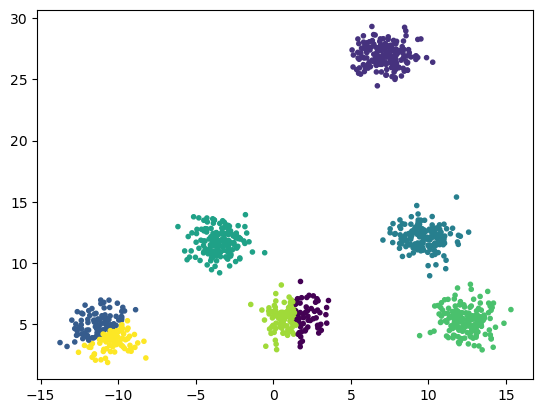

In [45]:
plt.scatter(data_blobs[:,0],data_blobs[:,1],c=y_kmeans_blobs, marker='.')

- Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_custers would you choose?
- Run the KMeans algorithm with your n_cluster parameter and plot your results.

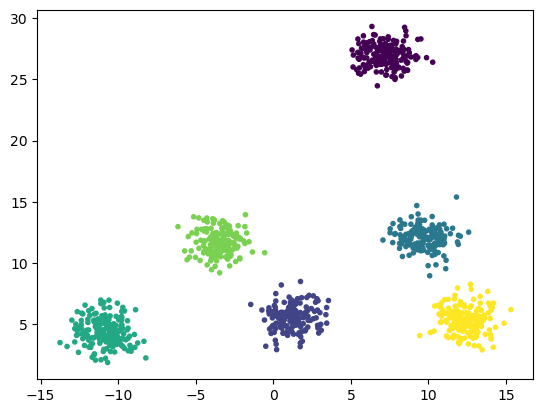

In [46]:
model = KMeans(n_clusters=6)
y_kmeans_blobs = model.fit_predict(data_blobs)
plt.scatter(data_blobs[:,0],data_blobs[:,1],c=y_kmeans_blobs, marker='.')


### 1b) Spiral dataset
Now we try to use the KMeans algorithm to cluster the Spiral dataset.

In [47]:
# load data
spiral = np.load("spiral.npz")['x']


- Use sklearn kmeans to cluster points and visualize it similar than before with the blob dataset

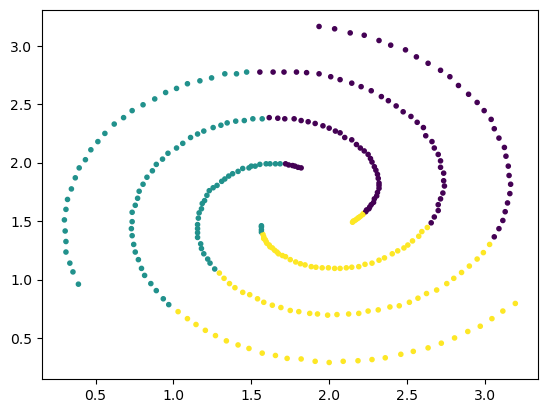

In [48]:
model = KMeans(n_clusters=3)
y_kmeans_spiral = model.fit_predict(spiral)

plt.scatter(spiral[:,0],spiral[:,1],c=y_kmeans_spiral, marker='.')

- Does it work? Please explain your answer, which assumptions required for kmeans? 
- What limitations do you think K-means would have?

In [49]:
print('''(Your answer here...)

By use of the Euclidean distance, Kmeans treats the data space as isotropic (distances unchanged by translations and rotations). This means that data points in each cluster are modeled as lying within a sphere around the cluster centroid. A sphere has the same radius in each dimension. Furthermore, as clusters are modeled only by the position of their centroids, Kmeans implicitly assumes all clusters have the same radius.

Kmeans clusters data points purely on their (Euclidean) geometric closeness to the cluster centroid. Therefore, it does not take into account the different densities of each cluster. So, because Kmeans implicitly assumes each cluster occupies the same volume in data space, each cluster must contain the same number of data points. We will show later that even when all other implicit geometric assumptions of Kmeans are satisfied, it will fail to learn a correct, or even meaningful, clustering when there are significant differences in cluster density.

refer to: 
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0162259''')

(Your answer here...)

By use of the Euclidean distance, Kmeans treats the data space as isotropic (distances unchanged by translations and rotations). This means that data points in each cluster are modeled as lying within a sphere around the cluster centroid. A sphere has the same radius in each dimension. Furthermore, as clusters are modeled only by the position of their centroids, Kmeans implicitly assumes all clusters have the same radius.

Kmeans clusters data points purely on their (Euclidean) geometric closeness to the cluster centroid. Therefore, it does not take into account the different densities of each cluster. So, because Kmeans implicitly assumes each cluster occupies the same volume in data space, each cluster must contain the same number of data points. We will show later that even when all other implicit geometric assumptions of Kmeans are satisfied, it will fail to learn a correct, or even meaningful, clustering when there are significant differences in cluster dens

## 2) sklearn mean-shift

In this section we do the same task as before but with the mean shift algorithm instead of kmeans.

### 2a) Toy dataset: blobs

- Use sklearn meanshift function to cluster points.

In [50]:
meanshift = MeanShift()
y_meanshift_blobs = meanshift.fit_predict(data_blobs)

- Plot clustering results 

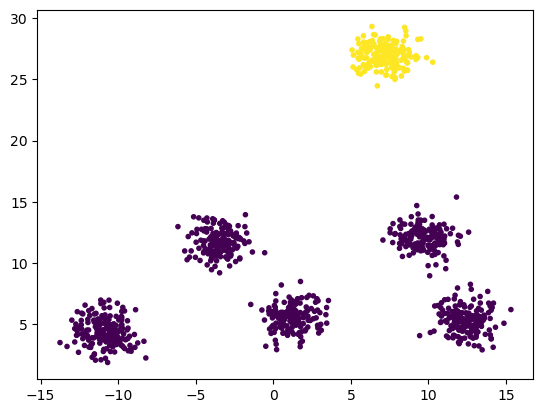

In [51]:
plt.scatter(data_blobs[:,0],data_blobs[:,1],c=y_meanshift_blobs, marker='.')

- Try different hyper-parameters (i.e. bandwidth, which is an important parameter for mean-shift) and plot the results.

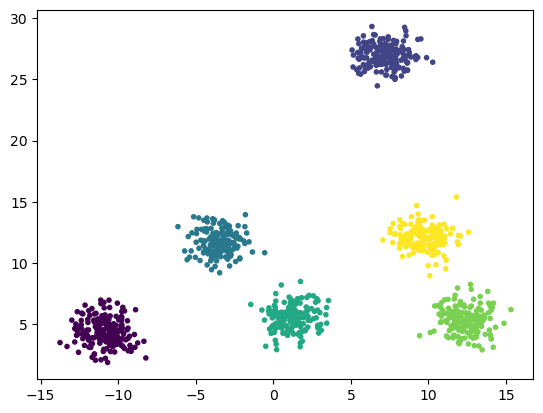

In [52]:
meanshift = MeanShift(bandwidth=3)
y_meanshift_blobs = meanshift.fit_predict(data_blobs)

plt.scatter(data_blobs[:,0],data_blobs[:,1],c=y_meanshift_blobs, marker='.')

### 2b) Toy dataset: spiral

- Use the Mean-shift to cluster the Spiral dataset.
- Plot the results.

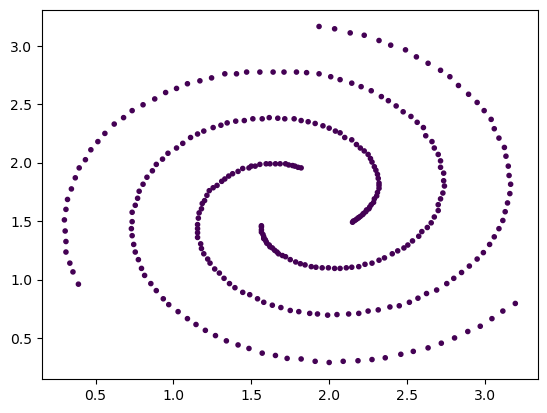

In [53]:
model = MeanShift()
y_meanshift_spiral = model.fit_predict(spiral)

plt.scatter(spiral[:,0],spiral[:,1],c=y_meanshift_spiral, marker='.')

- Does it work?
- What kind of data cluster is this approach better at discovering?
- (Optional) Brainstorm: do you have a solution for this dataset? 

In [54]:
print('''(Write your answer here...)
- No, it doesn't.
- Mean shift clustering aims to discover “blobs” in a smooth density of samples. 
- We can use another clustering approach "spectral clustering".''')

(Write your answer here...)
- No, it doesn't.
- Mean shift clustering aims to discover “blobs” in a smooth density of samples. 
- We can use another clustering approach "spectral clustering".
